In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
cm_all_ages_df = pd.read_csv('WHO_mortality_data\ghe2015_deaths_country_allages.csv')
country_conv = pd.read_csv('WHO_mortality_data\iso3_ctry_codes.csv')
populations = pd.read_csv('WHO_mortality_data\populations_world_bank_all.csv')
country_conv = country_conv.drop('m49_code', axis=1)
populations = populations.drop(['Country Name', 'Indicator Name', 'Indicator Code', '2016'], axis=1)
populations.rename(columns=lambda x: x.replace('20', 'pop20'), inplace=True)

* Years starting with 'dths' represent the estimated number of deaths for that year. 
* Years starting with 'low' or 'upp" represent the lower or uppe bound on the estimate for that year. (we can probably trim these)
* iso3: This represents the country
* cause2015: This is a numeric value that maps 1:1 to the 'causename' column

In [12]:
# populations = populations.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1)
# populations.rename(columns=lambda x: x.replace('20', 'pop20'), inplace=True)

def missing_values(df, name):
    print("Missing values in " + str(name))
    print(df.isnull().sum())
    
# missing_values(populations, 'populations')
# missing_values(country_conv, 'country_conv')
# missing_values(cm_all_ages_df, 'cm_all_ages_df')

In [16]:
mort_df = pd.merge(left=country_conv, right=cm_all_ages_df, on='iso3', how='inner')
cm_filter = ['iso3', 'country_name', 'cause2015', 'causename', 'sex']   
df_base = mort_df[cm_filter]
dths_filter = [col for col in mort_df if col.startswith('dths')]
cm_filter.extend(dths_filter)
mort_dths_df = mort_df[cm_filter]
mort_pop_dths_df = pd.merge(left=mort_dths_df, right=populations, on='iso3', how='inner')
mort_pop_dths_df

,iso3,country_name,cause2015,causename,sex,dths2000,dths2001,dths2002,dths2003,dths2004,...,pop2006,pop2007,pop2008,pop2009,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015
0,AFG,Afghanistan,0,All Causes,BTSX,249757.375000,257958.953125,248794.015625,245069.828125,249177.453125,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
1,AFG,Afghanistan,0,All Causes,FMLE,117107.531250,120994.710938,117902.468750,115992.000000,117699.750000,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
2,AFG,Afghanistan,0,All Causes,MLE,132649.859375,136964.265625,130891.523438,129077.820312,131477.671875,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
3,AFG,Afghanistan,10,"Communicable, maternal, perinatal and nutritio...",BTSX,148886.703125,153759.453125,145312.593750,136885.703125,134716.468750,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
4,AFG,Afghanistan,10,"Communicable, maternal, perinatal and nutritio...",FMLE,73044.179688,75408.343750,71414.062500,67164.992188,66151.710938,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
5,AFG,Afghanistan,10,"Communicable, maternal, perinatal and nutritio...",MLE,75842.554688,78351.109375,73898.554688,69720.726562,68564.757812,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
6,AFG,Afghanistan,20,Infectious and parasitic diseases,BTSX,69032.210938,72378.929688,62517.957031,52368.578125,48984.070312,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
7,AFG,Afghanistan,20,Infectious and parasitic diseases,FMLE,31542.091797,33172.195312,28451.066406,23261.728516,21701.623047,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
8,AFG,Afghanistan,20,Infectious and parasitic diseases,MLE,37490.128906,39206.738281,34066.898438,29106.843750,27282.441406,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0
9,AFG,Afghanistan,30,Tuberculosis,BTSX,13576.515625,13051.173828,12567.488281,13331.158203,12258.558594,...,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0


In [17]:
start_dths = mort_pop_dths_df.columns.get_loc('dths2000')
start_pops = mort_pop_dths_df.columns.get_loc('pop2000')
mort_per_capita = df_base
for i in range(2000, 2016):
    dths = str('dths' + str(i))
    pops = str('pop' + str(i))
    mort_per_capita[str(i)] = mort_pop_dths_df[dths]*100000/mort_pop_dths_df[pops]


In [19]:
# This contains the number of deaths per 100,000 by cause
mort_per_capita.to_csv('WHO_mortality_data\mort_by_cause_per_capita_allages.csv')

In [126]:
# This pulls out all of the unique causes of mortality 
causes = mort_per_capita['causename'].unique()

# This prints all of the available causes of death in the dataset
i = 0
cause_dict = {}
for cause in causes:
    cause_dict[cause] = i
    print(cause)
    i = i + 1

All Causes
Communicable, maternal, perinatal and nutritional conditions
Infectious and parasitic diseases
Tuberculosis
STDs excluding HIV
Syphilis
Chlamydia
Gonorrhoea
Trichomoniasis
Genital herpes
Other STDs
HIV/AIDS
Diarrhoeal diseases
Childhood-cluster diseases
Whooping cough
Diphtheria
Measles
Tetanus
Meningitis
Encephalitis
Hepatitis
Acute hepatitis A
Acute hepatitis B
Acute hepatitis C
Acute hepatitis E
Parasitic and vector diseases
Malaria
African trypanosomiasis
Chagas disease
Schistosomiasis
Leishmaniasis
Lymphatic filariasis
Onchocerciasis
Cysticercosis
Echinococcosis
Dengue
Trachoma
Yellow fever
Rabies
Intestinal nematode infections
Ascariasis
Trichuriasis
Hookworm disease
Food-bourne trematodes
Leprosy
Other infectious diseases
Respiratory infections 
Lower respiratory infections
Upper respiratory infections
Otitis media
Maternal conditions
Neonatal conditions
Preterm birth complications
Birth asphyxia and birth trauma
Neonatal sepsis and infections
Other neonatal condition

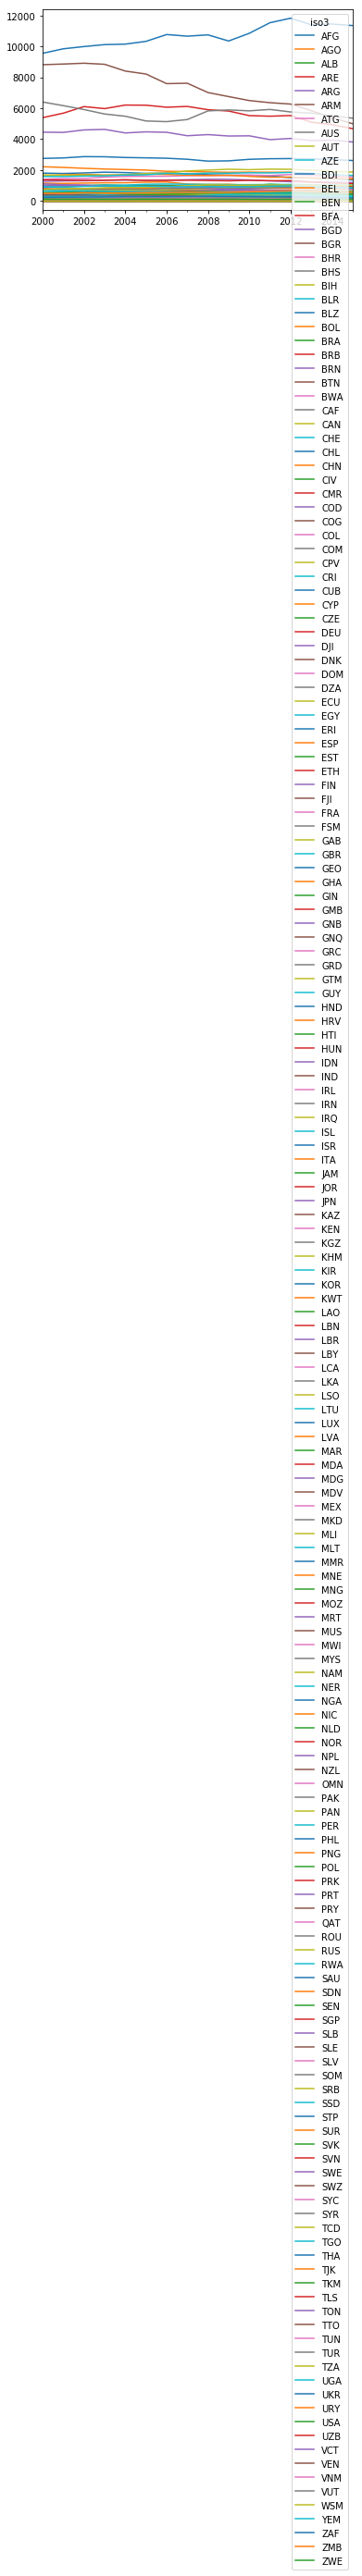

In [8]:
def cause_parser(cause):
    if isinstance(cause, str):
        if cause in cause_dict:
            return cause_dict[cause]
        else:
            return 'fail_case'
    elif isinstance(cause, int):
        if (cause >= 0) and (cause <= 214):
            return cause
    else:
        return 'cause_fail_case'

def gender_parser(gender):
    if isinstance(gender, str):
        gender = gender.lower()
    if (gender in ['both', 'b', '1']) or (gender == 1):
        return 'BTSX'
    elif (gender in ['f', 'fmle', 'female', '2']) or (gender == 2):
        return 'FMLE'
    elif (gender in ['m', 'mle', 'male', '3']) or (gender == 3):
        return 'MLE'
    else:
        return 'gender_fail_case'

    
def friendly_error_msg(msg):
    if isinstance(msg, str):
        if msg == 'cause_fail_case':
            print("Sorry, that's not a cause. Please enter an integer between 0 and 214, or")
            print("enter the string for a cause exactly as it appears in 'causes' list above")
            return 'cause_fail_case'
        elif msg == 'gender_fail_case':
            print("Sorry, that's not a correctly formatted gender option. Please enter ")
            print("'1' for both, '2' for female, or '3' for male")
            return 'gender_fail_case'
        else:
            return False
    

def cause_mortality_selector(gender, cause, df=mort_per_capita):
    cause_number = cause_parser(cause)
    gender_code = gender_parser(gender)
    if (cause_number == 'cause_fail_case'):
        friendly_error_msg(cause_number)
    elif gender_code in 'gender_fail_case':
        friendly_error_msg(gender_code)
    else:
        years = [yr.replace('dths','') for yr in dths_filter]
        cause_df = df[df['causename'] == causes[cause_number]]
        cause_gender_df = cause_df[cause_df['sex'] == gender_code]
        cause_gender_piv = cause_gender_df.pivot_table(index='iso3', values=years)
        cause_gender_piv.rename(columns=lambda x: pd.to_datetime(x), inplace=True)
        return cause_gender_piv

#     Still working on this
def cause_mortality_plot(gender, cause, df=cm_all_ages_dths_df):
    dths_df = cause_mortality_selector(gender, cause, df)
#     return dths_df
    if not friendly_error_msg(dths_df):
        dths_df.T.plot()
#         plt.show()
#         plt.title("Mortalty Cause: " + str(causes[cause_parser(cause)]))    

cause_mortality_plot('BOTH', 'Whooping cough')
# tmp

In [12]:

tmp1 = cause_mortality_selector('both', 1)
tmp1.iloc[0].to_json()
# tmp
# max(cm_all_ages_dths_df.T.isnull().sum())
# cm_all_ages_dths_df.T

'{"946684800000":148886.703125,"978307200000":153759.453125,"1009843200000":145312.59375,"1041379200000":136885.703125,"1072915200000":134716.46875,"1104537600000":134308.28125,"1136073600000":134247.109375,"1167609600000":129871.9375,"1199145600000":129019.4296875,"1230768000000":129202.6328125,"1262304000000":124572.046875,"1293840000000":121960.75,"1325376000000":117950.0078125,"1356998400000":109578.8984375,"1388534400000":105629.4375,"1420070400000":102516.0625}'

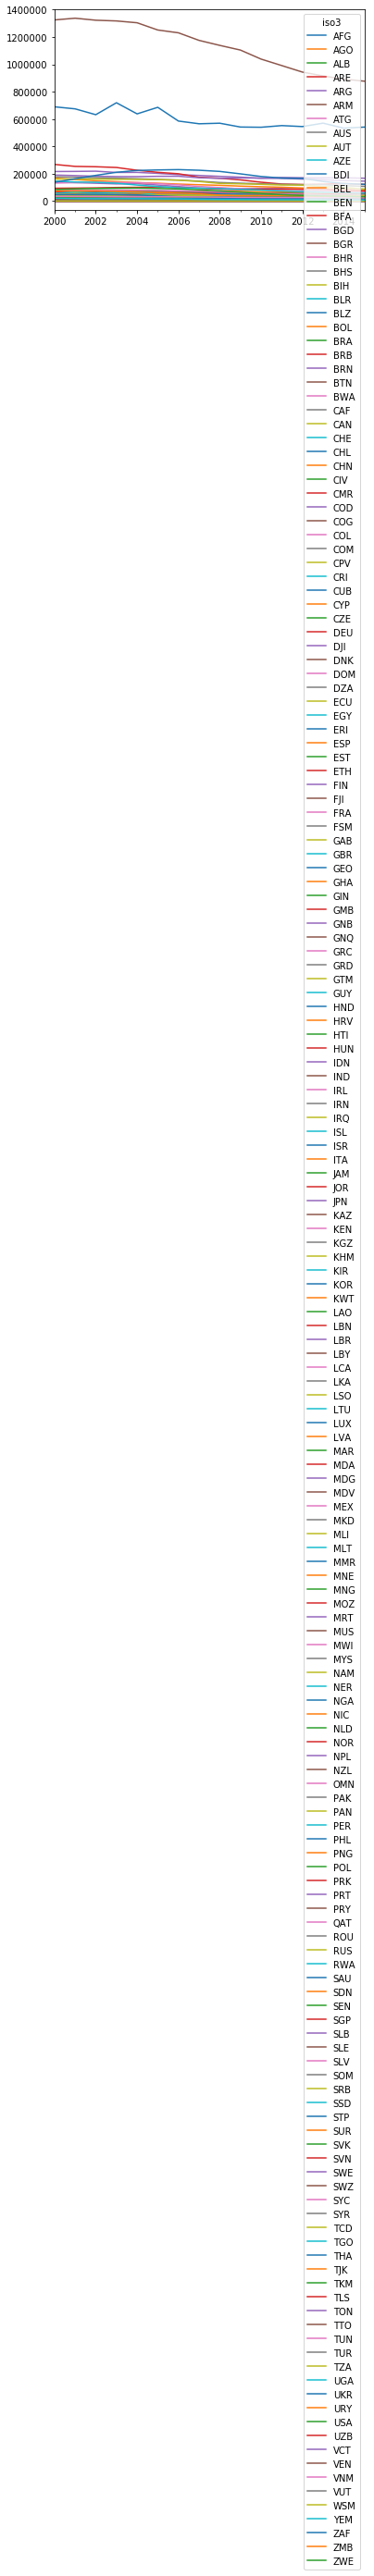

In [71]:
type(tmp)
type(tmp.columns)
def cause_mortality_plot(df, cause):
    
    tmp.T.plot()
    plt.title("Mortalty Cause: " + str(cause))

# tmp.plot(index=tmp.columns, columns=tmp.index)
# pd.to_datetime('2010')

In [14]:
len(cause_dict)

215